# importar recursos

In [12]:
import requests
from bs4 import BeautifulSoup
import csv
import os
import re
import csv
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

!pip install -U spacy
!python -m spacy download es_core_news_sm
!python -m spacy download es_core_news_lg


# Definir la ruta del archivo en el escritorio
archivo_csv = os.path.join(os.path.expanduser("~"), "Escritorio", "datos_extraidos.csv")

Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "c:\Users\USER\anaconda3\Lib\site-packages\spacy\__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "c:\Users\USER\anaconda3\Lib\site-packages\spacy\errors.py", line 3, in <module>
    from .compat import Literal
  File "c:\Users\USER\anaconda3\Lib\site-packages\spacy\compat.py", line 4, in <module>
    from thinc.util import copy_array
  File "c:\Users\USER\anaconda3\Lib\site-packages\thinc\__init__.py", line 5, in <module>
    from .config import registry
  File "c:\Users\USER\anaconda3\Lib\site-packages\thinc\config.py", line 5, in <module>
    from .types import Decorator
  File "c:\Users\USER\anaconda3\Lib\site-packages\thinc\types.py", line 25, in <module>
    from .compat import cupy, has_cupy
  File "c:\Users\USER\anaconda3\Lib\s

# Bases de datos periodico semana

In [21]:
# Lista de URLs de la base de datos semana
BASE_DATOS_SEMANA= [
"https://www.semana.com/opinion/articulo/sin-autonomia-regional-no-habra-paz/202348/",
"https://www.semana.com/opinion/articulo/acabar-los-procesos-de-paz-una-opcion/202334/",
"https://www.semana.com/opinion/articulo/clausewitz-y-el-laberinto-de-la-paz-total/202300/",
"https://www.semana.com/opinion/articulo/de-la-paz-total-a-la-paz-criminal/202300/",
"https://www.semana.com/opinion/articulo/paz-total-o-entrega-total/202353/",
"https://www.semana.com/opinion/articulo/eln-cinismo-para-la-paz/202310/",
"https://www.semana.com/opinion/articulo/por-que-los-procesos-de-paz-no-obtienen-resultados-tangibles/202351/",
"https://www.semana.com/opinion/articulo/la-paz-y-sus-incumplimientos/202340/",
"https://www.semana.com/opinion/articulo/la-paz-total-es-una-guerra-total/202342/",
"https://www.semana.com/opinion/articulo/no-mas-con-la-farsa-de-la-paz-total/202334/",
"https://www.semana.com/opinion/articulo/la-politica-de-paz-del-gobierno-es-mas-que-vergonzosa/202331/",
"https://www.semana.com/opinion/articulo/paz-total-con-seguridad-y-cero-tolerancia/202358/",
"https://www.semana.com/opinion/articulo/ley-y-proyectos-sobre-paz-total-primero-las-victimas/202335/",
"https://www.semana.com/opinion/articulo/paz-total-lobos-con-piel-de-oveja/202347/",
"https://www.semana.com/opinion/articulo/hora-de-hablar-con-verdades-de-la-paz-total/202309/",
"https://www.semana.com/opinion/articulo/el-fracaso-de-la-paz-totalmente-mafiosa/202316/",
"https://www.semana.com/opinion/articulo/una-paz-titanica/202346/",
"https://www.semana.com/opinion/articulo/un-proceso-de-paz-a-pesar-de-sus-promotores/202321/",
"https://www.semana.com/opinion/articulo/pisoteadores-de-la-paz/202334/",
'https://www.semana.com/opinion/articulo/una-paz-sin-principios/202233/',
'https://www.semana.com/opinion/articulo/paz-sin-duenos-ni-adjetivos/202200/',
'https://www.semana.com/opinion/articulo/proyecto-de-ley-para-la-paz-total/202258/',
'https://www.semana.com/opinion/articulo/colombia-potencia-mundial-de-la-paz/202230/',
'https://www.semana.com/opinion/articulo/no-es-paz-total-es-el-desgobierno-total/202356/',
'https://www.semana.com/opinion/articulo/la-paz-conducta-o-discurso/202314/',
'https://www.semana.com/opinion/articulo/paz-total-igual-a-impunidad-total/202211/',
'https://www.semana.com/opinion/articulo/la-verdadera-paz-total-por-que-no-pensar-en-un-nayib-bukele-en-colombia/202245/',
'https://www.semana.com/opinion/articulo/eln-paz-y-negocios/202209/',
'https://www.semana.com/opinion/articulo/colombia-la-paz-con-legalidad-que-transforma/202250/',
'https://www.semana.com/opinion/articulo/una-paz-estable-y-duradera/202253/',
'https://www.semana.com/opinion/articulo/paz-para-quien/202200/',
'https://www.semana.com/opinion/articulo/el-subversivo-misil-contra-la-paz/202027/',
'https://www.semana.com/opinion/articulo/la-verdadera-paz/202148/',
'https://www.semana.com/los-tales-amigos-de-la-paz-a-proposito-del-hijo-de-jorge-40-por-salud-hernandez/673487/',
'https://www.semana.com/columna-de-opinion-alvaro-jimenez/693310/',
'https://www.semana.com/la-verdad-y-la-paz/690817/',
'https://www.semana.com/opinion/articulo/libertad-y-orden-para-recuperar-el-rumbo/202308/',
'https://www.semana.com/opinion/articulo/petro-le-pone-una-lapida-a-la-libertad-de-prensa/202304/',
'https://www.semana.com/opinion/articulo/pedir-libertad-y-orden-es-un-golpe-de-estado/202326/',
'https://www.semana.com/opinion/articulo/no-es-libertad-de-expresion-es-delito/202303/',
'https://www.semana.com/opinion/articulo/en-colombia-peligra-la-libertad-de-prensa/202306/',
'https://www.semana.com/opinion/articulo/petro-amordaza-a-la-libre-prensa/202300/',
'https://www.semana.com/opinion/articulo/en-colombia-peligra-la-libertad-de-prensa/202306/',
'https://www.semana.com/opinion/articulo/gobierno-petro-un-regimen-en-contra-de-las-libertades/202322/',
'https://www.semana.com/opinion/articulo/dolor-de-patria/202348/',
'https://www.semana.com/opinion/articulo/donde-estan/202345/',
'https://www.semana.com/opinion/articulo/libertad-a-la-primera-linea-cuando-el-crimen-si-paga/202223/',
'https://www.semana.com/opinion/articulo/fracaso-asegurado/202213/',
'https://www.semana.com/economia/opinion/articulo/los-empresarios-no-son-enemigos/202227/',
'https://www.semana.com/opinion/articulo/la-arremetida-ideologica-socialista/202233/',
'https://www.semana.com/opinion/articulo/un-fallo-realmente-historico/202230/',
'https://www.semana.com/opinion/articulo/libertad-de-expresion-y-el-fraude-intelectual-de-la-actual-lucha-anticorrupcion/202122/',
'https://www.semana.com/economia/opinion/articulo/lideres-politicos-contra-la-libertad-de-prensa/202100/',
'https://www.semana.com/opinion/articulo/un-nuevo-liberalismo-que-nos-ilusiona/202100/',
'https://www.semana.com/opinion/articulo/la-otra-cara-de-nuestra-colombia/202156/',
'https://www.semana.com/opinion/articulo/la-deuda-de-la-constitucion-del-91-con-las-empresas/202101/',
'https://www.semana.com/donde-comienza-la-censura-columna-de-opinion-clara-lopez/688008/',
'https://www.semana.com/desobediencia-civil-columna-de-jorge-humberto-botero/674573/',
'https://www.semana.com/suena-interesante-el-protocolo-de-claudia-para-la-protesta-columna-de-marco-tulio-gutierrez/648722/',
'https://www.semana.com/si-al-aborto-sin-restricciones-por-maria-jimena-duzan/653204/',
'https://www.semana.com/queridos-ancianos-columna-de-jorge-h-botero/676381/',
'https://www.semana.com/opinion/articulo/autonomias-regionales-y-democracia-en-colombia/202331/',
'https://www.semana.com/economia/empresas/articulo/la-democracia-colombiana-triunfo-fenalco-celebro-resultados-de-elecciones-regionales-e-hizo-llamado-al-congreso/202300/',
'https://www.semana.com/opinion/articulo/ministerio-de-agricultura-o-de-la-expropiacion-desafios-para-la-democracia-y-la-propiedad-privada/202312/',
'https://www.semana.com/nacion/articulo/ojala-no-se-rompa-la-democracia-el-presidente-esta-desconociendo-el-estado-social-de-derecho-la-explosiva-respuesta-de-la-procuradora-ante-choque-con-petro/202317/',
'https://www.semana.com/confidenciales/articulo/el-discurso-del-presidente-petro-esta-calando-gravemente-y-pone-en-riesgo-nuestra-democracia-david-luna/202336/',
'https://www.semana.com/nacion/articulo/que-es-lo-que-mas-le-preocupa-al-escritor-hector-abad-sobre-la-democracia-en-colombia-esta-fue-su-contundente-respuesta-en-el-cierre-del-congreso-de-la-andi/202339/',
'https://www.semana.com/nacion/articulo/estas-son-las-razones-de-los-veteranos-y-las-reservas-para-marchar-este-19-de-julio-respaldo-a-la-democracia-y-a-las-instituciones/202324/',
'https://www.semana.com/economia/macroeconomia/articulo/el-llamado-urgente-que-le-hacen-al-consejo-gremial-para-que-el-sector-privado-defienda-la-democracia-colombiana/202347/',
'https://www.semana.com/confidenciales/articulo/bruce-mac-master-dio-las-razones-por-las-que-marcharan-los-colombianos-hoy-20-de-junio-en-democracia-todos-tenemos-derecho-a-expresarnos/202316/',
'https://www.semana.com/confidenciales/articulo/golpea-la-democracia-partido-de-la-u-frente-a-la-idea-de-imponer-la-reforma-a-la-salud-por-decreto/202323/',
'https://www.semana.com/politica/articulo/colombia-tendria-mas-de-120-mil-candidatos-en-las-proximas-elecciones-interes-por-la-democracia/202342/',
'https://www.semana.com/nacion/articulo/duque-pidio-defender-la-democracia-de-los-autocratas-que-se-nutren-del-populismo/202203/',
'https://www.semana.com/economia/opinion/articulo/llego-el-dia-unamonos-para-salvar-la-democracia/202230/',
'https://www.semana.com/opinion/articulo/democracia-y-partidos-politicos/202104/',
'https://www.semana.com/opinion/articulo/golpe-a-la-democracia/202100/',
'https://www.semana.com/opinion/articulo/democracia-aleatoria/202026/',
'https://www.semana.com/opinion/articulo/democracia-directa/202057/',
'https://www.semana.com/opinion/articulo/catedra-magistral-de-democracia/202018/',
'https://www.semana.com/la-salud-de-la-democracia-colombiana-en-medio-de-la-pandemia/678189/',
'https://www.semana.com/opinion/articulo/aberracion-juridica-o-libreto-preestablecido/202316/',
'https://www.semana.com/opinion/articulo/criminales-los-faros-de-la-moral/202300/',
'https://www.semana.com/opinion/articulo/mensaje-en-plena-recta-final/202348/',
'https://www.semana.com/opinion/articulo/silencio-complice/202359/',
'https://www.semana.com/economia/opinion/articulo/reforma-con-impacto-colectivo/202300/',
'https://www.semana.com/economia/opinion/articulo/hacia-un-futuro-diferente/202300/',
'https://www.semana.com/economia/opinion/articulo/la-justicia-tiene-la-palabra/202323/',
'https://www.semana.com/opinion/articulo/crisis-y-oportunidad/202353/',
'https://www.semana.com/opinion/articulo/dos-mas-dos-son-cinco/202339/',
'https://www.semana.com/opinion/articulo/la-justicia-politica/202304/',
'https://www.semana.com/economia/opinion/articulo/impunidad-ancestral/202214/',
'https://www.semana.com/opinion/articulo/un-pesimo-precedente-de-justicia/202203/',
'https://www.semana.com/economia/opinion/articulo/justicia-virtual-el-avance-mas-significativo-en-decadas/202231/',
'https://www.semana.com/opinion/articulo/un-retroceso-en-la-justicia/202200/',
'https://www.semana.com/opinion/articulo/el-jinete-justiciero/202224/',
]
# Crear una lista para almacenar los datos extraídos
datos_extraidos = []

nombre_periodico = "Semana"

# Iterar sobre cada URL de la base de datos
for URL_BASE in BASE_DATOS_SEMANA:
    pedido_obtenido = requests.get(URL_BASE)
    html_obtenido = pedido_obtenido.text
    soup = BeautifulSoup(html_obtenido, "html.parser")

    # Encontrar los elementos <div> con la clase "font--secondary"
    divs = soup.find_all(class_="max-w-screen-md prose prose-lg mx-auto mb-5")

    # Crear una lista para almacenar los textos del artículo
    texto_articulo = []
    for div in divs:
        texto_articulo.append(div.text.strip())

    # Unir todos los textos del artículo en una cadena
    articulo_completo = " ".join(texto_articulo)

    # Extraer el nombre del autor
    autor = "Autor no encontrado"  # Valor por defecto
    # Intentar encontrar el autor en el primer div
    autor_div = soup.find("div", class_="mb-6 text-smoke-500")
    if autor_div:
        autor_nombre = autor_div.find("div", class_="mb-1 border-l border-primary pl-2 text-sm font-medium")
        if autor_nombre:
            autor = autor_nombre.text.strip()

    # Si no se encontró el autor en el primer div, intentar con la imagen
    if autor == "Autor no encontrado":
        img_tag = soup.find("img", alt=True)
        if img_tag:
            autor = img_tag["alt"].strip()

    # Extraer la fecha de publicación
    autor_div = soup.find("div", class_="mb-6 text-smoke-500")
    if autor_div:
        fecha_div = autor_div.find("div", class_="pl-2 text-xs leading-none")
        fecha = fecha_div.text.strip() if fecha_div else "Fecha no encontrada"
    else:
        fecha = "Fecha no encontrada"

    # Contar el número de palabras del artículo
    num_palabras = len(articulo_completo.split())

    # Agregar los datos extraídos a la lista
    datos_extraidos.append([autor, fecha, num_palabras, articulo_completo])

# Crear el DataFrame de pandas con las columnas originales
columnas = ["Autor", "Fecha de Publicación", "Número de Palabras", "Texto del Artículo"]
df = pd.DataFrame(datos_extraidos, columns=columnas)

# Añadir el nombre del periódico a cada entrada
df["Nombre del Periódico"] = nombre_periodico

# Eliminar la columna de texto del artículo
df = df.drop(columns=["Texto del Artículo"])

# Mostrar las tres primeras filas del DataFrame
print(df)

# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidossemana_descriptivo_COMPLETO.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Escribir la cabecera
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Escribir los datos
    for index, row in df.iterrows():
        escritor_csv.writerow(row)

                                                Autor  \
0                                           Iván Name   
1                          Jesús Pérez González-Rubio   
2                              Aurelio Suárez Montoya   
3   Francisco Barbosa Delgado, Fiscal general de l...   
4                                 Jorge Enrique Vélez   
..                                                ...   
90                       José Miguel Santamaría Uribe   
91                        Nicole Levy. Columna Semana   
92                  Camilo Cuervo (Foto para columna)   
93                                      Diana Giraldo   
94                              JORGE HUMBERTO BOTERO   

       Fecha de Publicación  Número de Palabras Nombre del Periódico  
0   29 de diciembre de 2023                 648               Semana  
1   15 de noviembre de 2023                 821               Semana  
2   18 de noviembre de 2023                 791               Semana  
3   18 de noviembre de 2023    

PermissionError: [Errno 13] Permission denied: 'datos_extraidossemana_descriptivo_COMPLETO.csv'

# Analisis Descriptivo

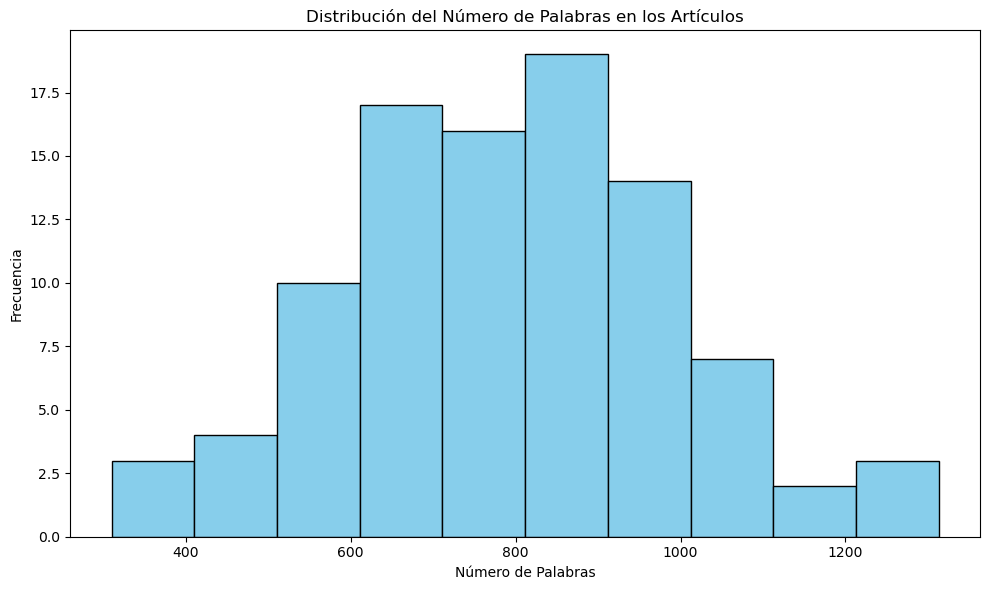

In [22]:
# Gráfica 1: Distribución del Número de Palabras
plt.figure(figsize=(10, 6))
plt.hist(df['Número de Palabras'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Palabras en los Artículos')
plt.tight_layout()
plt.show()

In [23]:
df["Autor"]

0                                             Iván Name
1                            Jesús Pérez González-Rubio
2                                Aurelio Suárez Montoya
3     Francisco Barbosa Delgado, Fiscal general de l...
4                                   Jorge Enrique Vélez
                            ...                        
90                         José Miguel Santamaría Uribe
91                          Nicole Levy. Columna Semana
92                    Camilo Cuervo (Foto para columna)
93                                        Diana Giraldo
94                                JORGE HUMBERTO BOTERO
Name: Autor, Length: 95, dtype: object

In [24]:
patrones_a_eliminar = [
    r', Fiscal general de la Nación- Columnista invitado para esta edición',
    r'Columna Semana',
    r', columnista invitado',
    r'Procuradora General de la Nación',
    r'Exvicepresidenta de Colombia- Columnista invitada para esta edición',
    r' (Foto para columna)',
    r' columnista',
    r'Defensor del Pueblo',
    r'Senador Partido Cambio Radical',
    r'Presidente de la Andi',
    r' senador Partido de la U.',
    r'Almirante-',
    r' sobre declaraciones del presidente Gustavo Petro',
    r'Escritor y periodista',
    r'General en retiro del Ejército Nacional '

]

# Unir los patrones en una sola expresión regular
patron_completo = '|'.join(patrones_a_eliminar)

# Reemplazar los patrones en la columna "Autor"
df["Autor"] = df["Autor"].str.replace(patron_completo, '', regex=True)

# Eliminar espacios adicionales resultantes
df["Autor"] = df["Autor"].str.strip()

# Reemplazar los valores en blanco con "Semana"
df["Autor"] = df["Autor"].replace('', 'Semana')
df["Autor"] = df["Autor"].replace('-', 'Semana')

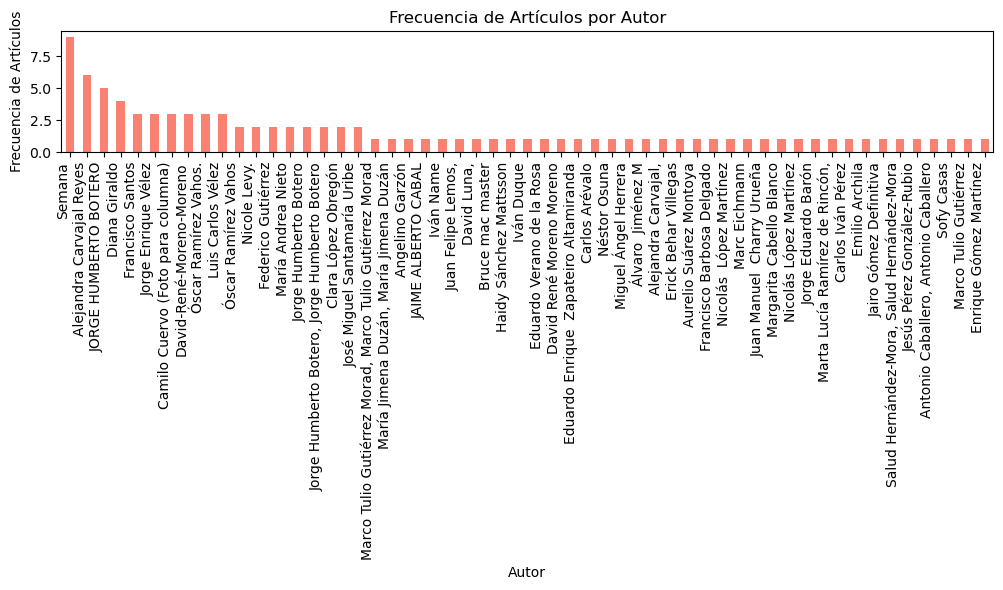

In [25]:
# Gráfica 2: Frecuencia de artículos por autor
plt.figure(figsize=(10, 6))
df['Autor'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Autor')
plt.ylabel('Frecuencia de Artículos')
plt.title('Frecuencia de Artículos por Autor')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
from datetime import datetime

# Diccionario de meses en español a inglés
meses = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March',
    'abril': 'April', 'mayo': 'May', 'junio': 'June',
    'julio': 'July', 'agosto': 'August', 'septiembre': 'September',
    'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

def convertir_fecha(fecha):
    # Elimina espacios no separables y limpia la cadena
    fecha = fecha.replace('\xa0', ' ').strip()

    # Reemplaza el mes en español con el mes en inglés
    for espanol, ingles in meses.items():
        if espanol in fecha:
            fecha = fecha.replace(espanol, ingles)
            break

    # Elimina 'de' y corrige la cadena
    fecha_str = fecha.replace('de', '').strip()
    
    try:
        return datetime.strptime(fecha_str, '%d %B %Y')
    except ValueError as e:
        print(f"Error al convertir la fecha: {fecha_str} - {e}")
        return None

# Aplicar la conversión de fechas
df['Fecha de Publicación'] = df['Fecha de Publicación'].apply(convertir_fecha)


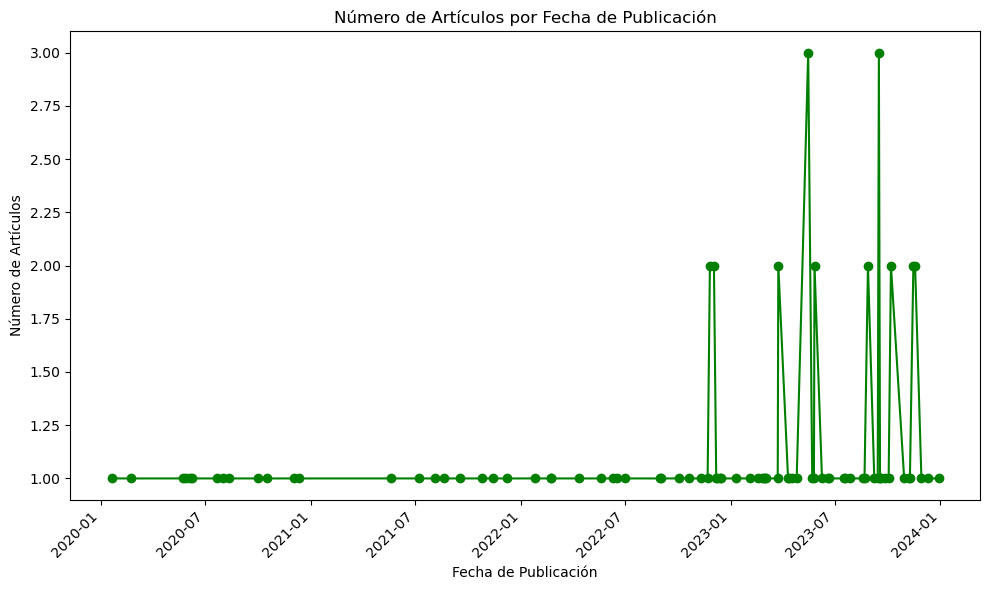

In [27]:
# Gráfica 3: Artículos por Fecha de Publicación
plt.figure(figsize=(10, 6))
df['Fecha de Publicación'].value_counts().sort_index().plot(kind='line', marker='o', linestyle='-', color='green')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Número de Artículos')
plt.title('Número de Artículos por Fecha de Publicación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidossemana_descriptivo_COMPLETO.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Escribir la cabecera
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Escribir los datos
    for index, row in df.iterrows():
        escritor_csv.writerow(row)